In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
import os
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import datasets, linear_model, metrics

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', None)

np.random.seed(0)

In [2]:
data_dir = Path('./Data_Files')

In [3]:
# Params
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'ls'}

In [4]:
def convert(df: pd.DataFrame, frame_size=10):
    x = np.asarray(df.iloc[:, 1]).reshape(-1, frame_size)
#     x = x[x.shape[0]//10:-x.shape[0]//10]
    return x


def change(df4: pd.DataFrame):
    for index, row in df4.iterrows():
        if row['frequency'] != "airflow(m/s)":
            if float(row['frequency']) > 500:
                df4.drop(index, inplace=True)
    return df4

In [5]:
data_dir6 = Path("./new_files_july23/") 

df29 = pd.read_csv(data_dir6 / "desk.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df29 = df29[df29['frequency'] != "clocktime"]
df29 = df29.dropna()
df29 = change(df29)
df29 = convert(df29)

df30 = pd.read_csv(data_dir6 / "no_air.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df30 = df30[df30['frequency'] != "clocktime"]
df30 = df30.dropna()
df30 = change(df30)
df30 = convert(df30)

df31 = pd.read_csv(data_dir6 / "onvent.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df31 = df31[df31['frequency'] != "clocktime"]
df31 = df31.dropna()
df31 = change(df31)
df31 = convert(df31)

In [6]:
data_dir7 = Path("./final/") 

df32 = pd.read_csv(data_dir7 / "1m_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df32 = df32[df32['frequency'] != "clocktime"]
df32 = df32.dropna()
df32 = change(df32)
df32 = convert(df32)

df33 = pd.read_csv(data_dir7 / "fan_66cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df33 = df33[df33['frequency'] != "clocktime"]
df33 = df33.dropna()
df33 = change(df33)
df33 = convert(df33)
dftest4 = df33[-50:]
df33 = df33[-50:]

df34 = pd.read_csv(data_dir7 / "50cm_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df34 = df34[df34['frequency'] != "clocktime"]
df34 = df34.dropna()
df34 = change(df34)
df34 = convert(df34)
# df34 = df34[:129*198]

df35 = pd.read_csv(data_dir7 / "150cm_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df35 = df35[df35['frequency'] != "clocktime"]
df35 = df35.dropna()
# df35 = df35[:211*129]
df35 = change(df35)
df35 = convert(df35)


data_dir8 = Path("./finale/") 
df36 = pd.read_csv(data_dir7 / "50cm_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df36 = df36[df36['frequency'] != "clocktime"]
df36 = df36.dropna()
df36 = change(df36)
df36 = convert(df36)
# df36 = df36[:129*198]

df37 = pd.read_csv(data_dir7 / "1m_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df37 = df37[df37['frequency'] != "clocktime"]
df37 = df37.dropna()
df37 = change(df37)
df37 = convert(df37)
# df37 = df37[:129*198]

In [7]:
df34

array([[6.70182937e+04, 2.80998738e+04, 8.76974000e+02, ...,
        3.92943400e+02, 2.66950000e+02, 3.01000000e+00],
       [1.44151110e+03, 9.55155400e+02, 1.37974300e+02, ...,
        6.09679000e+01, 3.00350000e+01, 3.15000000e+00],
       [9.76112600e+02, 6.68443100e+02, 1.72824300e+02, ...,
        5.02424000e+01, 1.75779000e+01, 3.59000000e+00],
       ...,
       [1.07246120e+03, 8.70115300e+02, 4.58536600e+02, ...,
        5.65764000e+01, 3.26326000e+01, 7.13000000e+00],
       [1.86571620e+03, 8.71248900e+02, 3.63561600e+02, ...,
        3.81551000e+01, 3.86097000e+01, 6.65000000e+00],
       [3.90487400e+02, 2.24437000e+02, 1.80475500e+02, ...,
        3.11271000e+01, 2.76080000e+01, 4.95000000e+00]])

In [8]:


df36[:129*210]

array([[6.70182937e+04, 2.80998738e+04, 8.76974000e+02, ...,
        3.92943400e+02, 2.66950000e+02, 3.01000000e+00],
       [1.44151110e+03, 9.55155400e+02, 1.37974300e+02, ...,
        6.09679000e+01, 3.00350000e+01, 3.15000000e+00],
       [9.76112600e+02, 6.68443100e+02, 1.72824300e+02, ...,
        5.02424000e+01, 1.75779000e+01, 3.59000000e+00],
       ...,
       [1.07246120e+03, 8.70115300e+02, 4.58536600e+02, ...,
        5.65764000e+01, 3.26326000e+01, 7.13000000e+00],
       [1.86571620e+03, 8.71248900e+02, 3.63561600e+02, ...,
        3.81551000e+01, 3.86097000e+01, 6.65000000e+00],
       [3.90487400e+02, 2.24437000e+02, 1.80475500e+02, ...,
        3.11271000e+01, 2.76080000e+01, 4.95000000e+00]])

In [32]:
data_dir9 = Path('./Aug12')

df38 = pd.read_csv(data_dir9 / "vent1_1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df38 = df38[df38['frequency'] != "clocktime"]
df38 = df38.dropna()
df38 = convert(df38)
# dftest1 = df38[-50:]
# df38 = df38[-50:]


df39 = pd.read_csv(data_dir9 / "v1_50cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df39 = df39[df39['frequency'] != "clocktime"]
df39 = df39.dropna()
df39 = convert(df39)
# dftest0_5 = df39[-50:]
# df39 = df39[-50:]



df40 = pd.read_csv(data_dir9 / "v1_150cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df40 = df40[df40['frequency'] != "clocktime"]
df40 = df40.dropna()
df40 = convert(df40)
# dftest1_5 = df40[-50:]
# df40 = df40[-50:]


df41 = pd.read_csv(data_dir9 / "v1_2m.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df41 = df41[df41['frequency'] != "clocktime"]
df41 = df41.dropna()
df41 = convert(df41)
# dftest2 = df41[-50:]
# df41 = df41[-50:]

# df38 = pd.read_csv(data_dir9 / "vent1_1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
# df38 = df38[df38['frequency'] != "clocktime"]
# df38 = df38.dropna()
# df38 = convert(df38)


df00 = pd.read_csv(data_dir9 / "homevent.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df00 = df00[df00['frequency'] != "clocktime"]
df00 = df00.dropna()
df00 = convert(df00)
dftest5 = df00[-50:]
df00 = df00[-50:]

df01 = pd.read_csv(data_dir9 / "svent_1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df01 = df01[df01['frequency'] != "clocktime"]
df01 = df01.dropna()
df01 = convert(df01)
dftest6 = df01[-50:]
df01 = df01[-50:]

In [10]:
data_dir10 = Path('./Nov8')

df42 = pd.read_csv(data_dir10 / "new1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df42 = df42[df42['frequency'] != "clocktime"]
df42 = df42.dropna()
df42 = convert(df42)
dftest1 = df42[-50:]
df42 = df42[-50:]

df43 = pd.read_csv(data_dir10 / "new2.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df43 = df43[df43['frequency'] != "clocktime"]
df43 = df43.dropna()
df43 = convert(df43)
dftest2 = df43[-50:]
df43 = df43[-50:]

df44 = pd.read_csv(data_dir10 / "new3.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df44 = df44[df44['frequency'] != "clocktime"]
df44 = df44.dropna()
df44 = convert(df44)
dftest3 = df44[-50:]
df44 = df44[-50:]

# df45 = pd.read_csv(data_dir10 / "new4.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
# df45 = df45[df45['frequency'] != "clocktime"]
# df45 = df45.dropna()
# df45 = convert(df45)
# dftest1 = df45[-50:]
# df45 = df45[-50:]



In [11]:
# df = df1.append([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df16, df17, df18, df20, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31, df32, df33])
# df = np.concatenate([df29, df30, df31, df32, df33, df34, df35, df36, df37])

# df = np.concatenate([df39, df38, df40, df41])
# df = np.concatenate([df39, df38, df40, df41, df32, df34, df35, df36, df37, df29, df30, df31, df42])
df = np.concatenate([df39, df38, df40, df41, df32, df34, df35, df36, df37, df29, df30, df31])

In [12]:
# df = df[df.columns[1:2]]


In [13]:
data = df


In [14]:
X = data[:,:-1]

X = X[:, :7]
X.shape

(3971, 7)

In [15]:
y = data[:, -1]
y.shape


(3971,)

In [16]:
print (X.shape, y.shape)

(3971, 7) (3971,)


In [17]:
print(max(y), min(y))
for i in range(len(y)):
    if i >= len(y):
        break
    if y[i]>35 or y[i]<1:
        print (i, y[i])
        X = np.delete(X, i, axis = 0)
        y = np.delete(y, i)
        

32.9 2.17


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=4, min_samples_split=5, n_estimators=500)

In [20]:
from joblib import dump, load
dump(reg, "flowSense.joblib")

['flowSense.joblib']

In [21]:
y_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [22]:
print(y_pred[:5])
print(y_test[:5])

[3.68524    4.12769695 3.9489478  4.02376662 3.43278669]
[4.95 4.41 3.29 3.29 4.95]


In [23]:
print(y_train_pred[:5])
print(y_train[:5])

[ 3.60867648  3.36180339  3.80520357  6.69991634 27.8699469 ]
[ 3.29  3.08  3.44  7.26 27.47]


In [24]:
print("MSE of test: ", mean_squared_error(y_test, y_pred))
print(y_pred.shape)

print("Test Reg score: ", reg.score(X_test, y_test))
    

MSE of test:  2.993227485393659
(795,)
Test Reg score:  0.9326421759268687


In [25]:
print("MSE of training: ",  mean_squared_error(y_train, y_train_pred))

print("Train Reg score: ", reg.score(X_train, y_train))

MSE of training:  0.352488215943932
Train Reg score:  0.9912053587229717


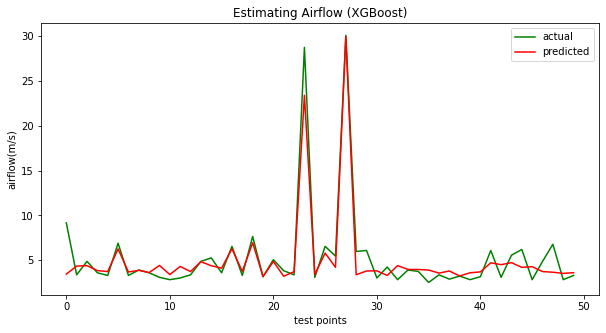

In [26]:
plt.figure(figsize=(10,5))
plt.plot(y_test[50:100], 'g', label="actual")
plt.plot(y_pred[50:100], 'r', label="predicted")
plt.legend()
plt.xlabel("test points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")
plt.savefig("final.png")

Text(0.5, 1.0, 'Estimating Airflow (XGBoost)')

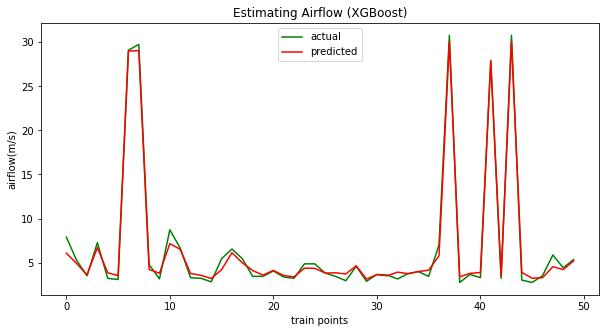

In [27]:
plt.figure(figsize=(10,5))
plt.plot(y_train[50:100], 'g', label="actual")
plt.plot(y_train_pred[50:100], 'r', label="predicted")
plt.legend()
plt.xlabel("train points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")
# plt.savefig("1m_v1.jpg")



6.89
Mean Squared Error:  2.8991496340232947
Regression Score:  -0.31445253978717935


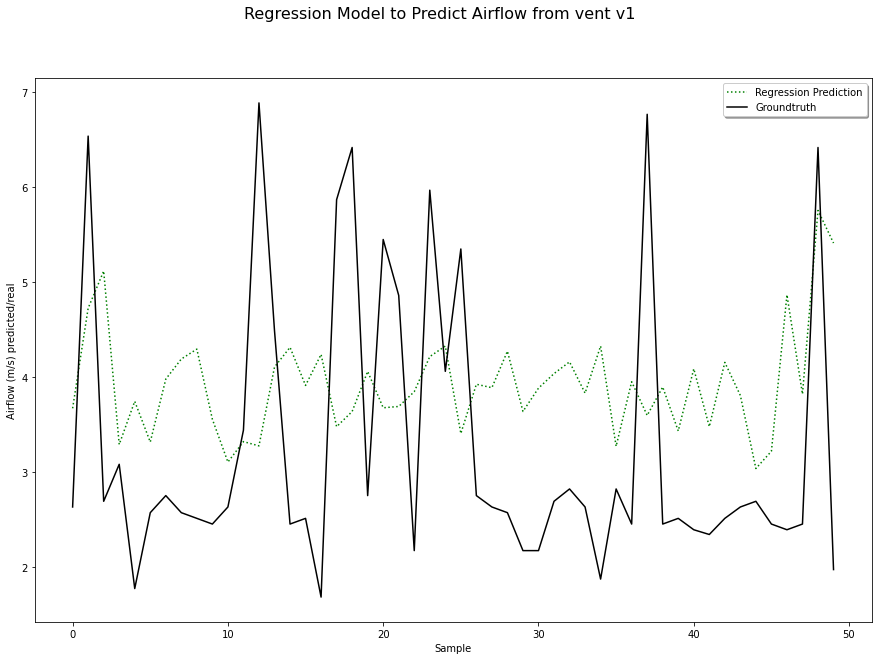

In [28]:
X = dftest1[:,:-1]
X = X[:, :7]
X.shape

y = dftest1[:, -1]
y.shape
print (max(y))
y_pred = reg.predict(X)
print ("Mean Squared Error: ", mean_squared_error(y_pred, y))
    
print("Regression Score: ", reg.score(X, y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Regression Model to Predict Airflow from vent v1', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()


Mean Squared Error:  3.3290902015671007
Regression Score:  -3.8789304759184926


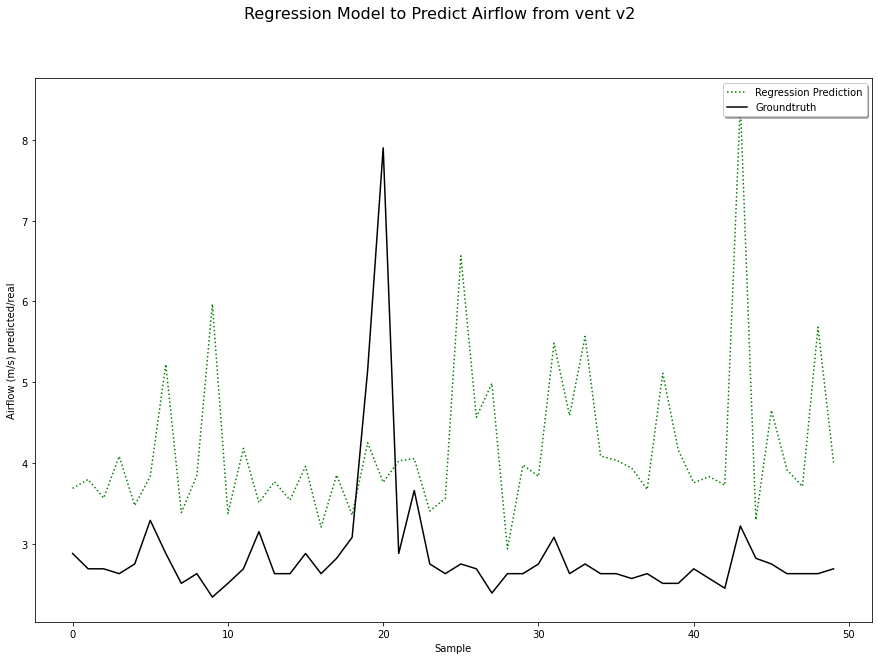

In [29]:
X = dftest2[:,:-1]
X = X[:, :7]
X.shape

y = dftest2[:, -1]
y.shape

y_pred = reg.predict(X)
print ("Mean Squared Error: ", mean_squared_error(y_pred, y))
    
print("Regression Score: ", reg.score(X, y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Regression Model to Predict Airflow from vent v2', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()


Mean Squared Error:  3.5376134316954957
Regression Score:  -0.11074273784219058


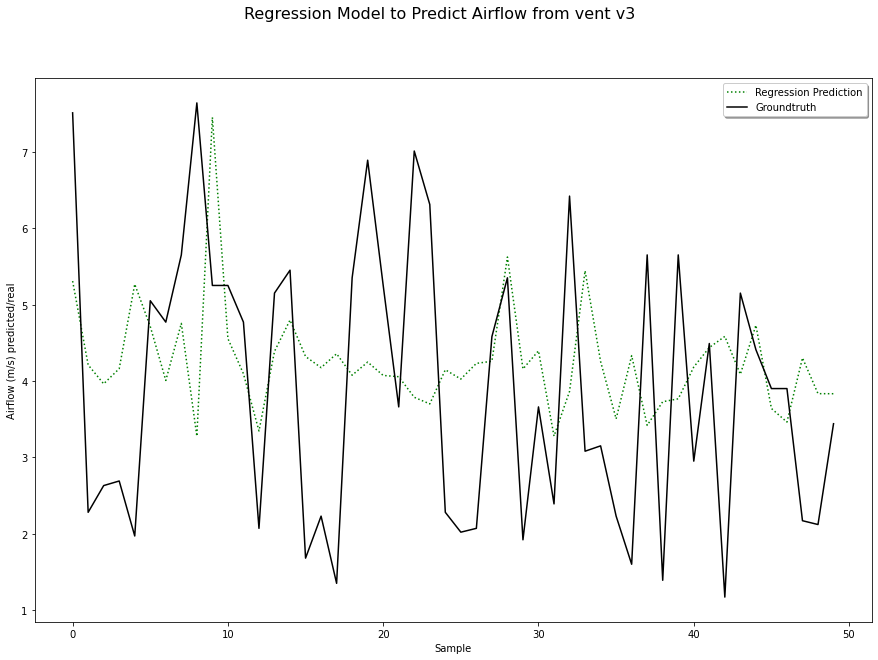

In [30]:
X = dftest3[:,:-1]
X = X[:, :7]
X.shape

y = dftest3[:, -1]
y.shape

y_pred = reg.predict(X)
print ("Mean Squared Error: ", mean_squared_error(y_pred, y))
    
print("Regression Score: ", reg.score(X, y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Regression Model to Predict Airflow from vent v3', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()


Mean Squared Error:  31.17362828096871
Regression Score:  -5.1237392028411035


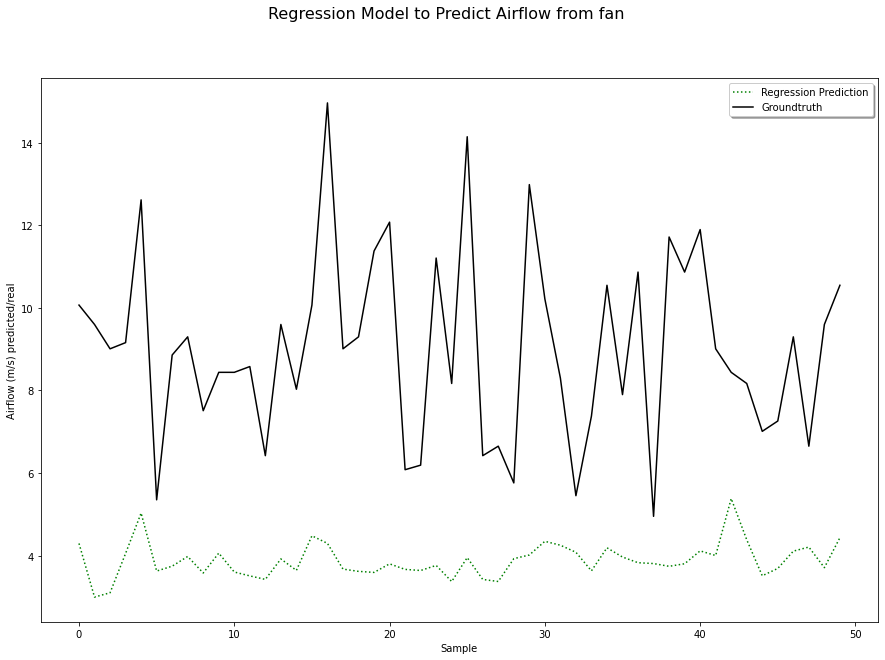

In [31]:
X = dftest4[:,:-1]
X = X[:, :7]
X.shape

y = dftest4[:, -1]
y.shape

y_pred = reg.predict(X)
print ("Mean Squared Error: ", mean_squared_error(y_pred, y))
    
print("Regression Score: ", reg.score(X, y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Regression Model to Predict Airflow from fan', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()


Mean Squared Error:  5.292742693918383
Regression Score:  0.27780018749366175


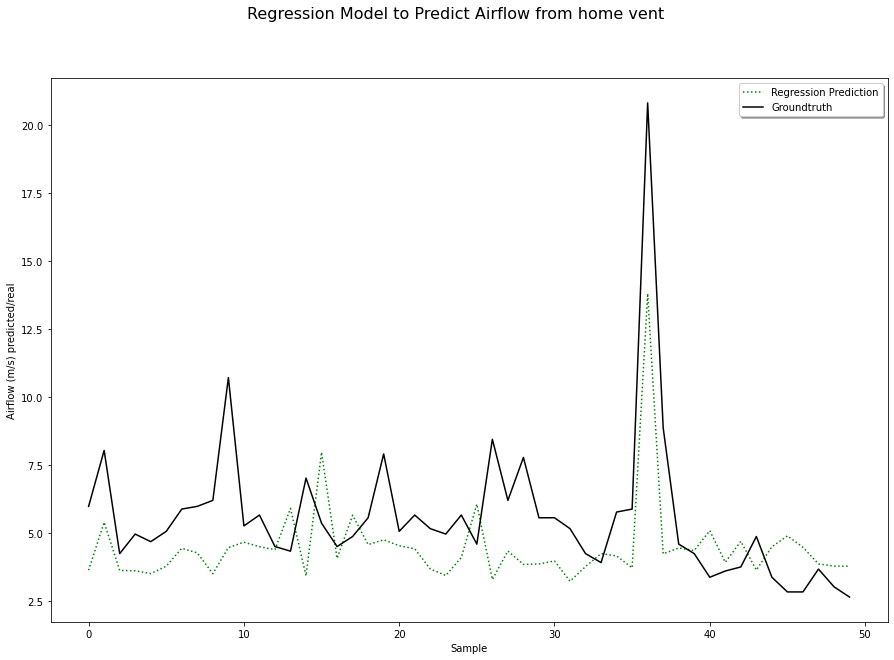

In [34]:
X = dftest5[:,:-1]
X = X[:, :7]
X.shape

y = dftest5[:, -1]
y.shape

y_pred = reg.predict(X)
print ("Mean Squared Error: ", mean_squared_error(y_pred, y))
    
print("Regression Score: ", reg.score(X, y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Regression Model to Predict Airflow from home vent', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()


Mean Squared Error:  151.50356879072947
Regression Score:  -4.233149775575889


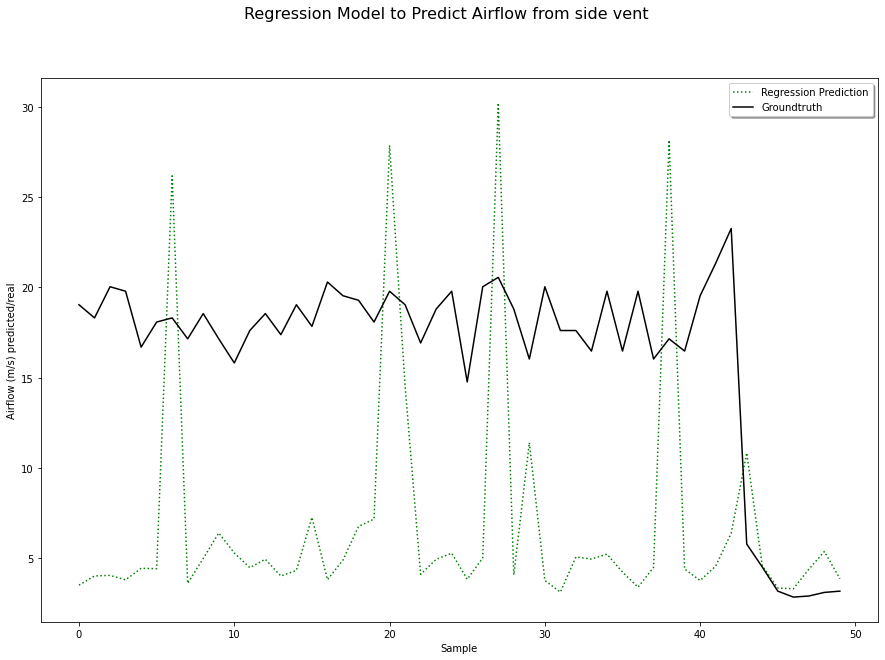

In [35]:
X = dftest6[:,:-1]
X = X[:, :7]
X.shape

y = dftest6[:, -1]
y.shape

y_pred = reg.predict(X)
print ("Mean Squared Error: ", mean_squared_error(y_pred, y))
    
print("Regression Score: ", reg.score(X, y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Regression Model to Predict Airflow from side vent', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()
